# Описание проекта

<div style="border:solid blue 2px; padding: 20px"> 
    

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
    
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
    
    
<b>Описание данных games.csv</b>
    
- Name — название игры
    
- Platform — платформа
    
- Year_of_Release — год выпуска
    
- Genre — жанр игры
    
- NA_sales — продажи в Северной Америке (миллионы долларов)
    
- EU_sales — продажи в Европе (миллионы долларов)
    
- JP_sales — продажи в Японии (миллионы долларов)
    
- Other_sales — продажи в других странах (миллионы долларов)
    
- Critic_Score — оценка критиков (от 0 до 100)
    
- User_Score — оценка пользователей (от 0 до 10)
    
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
    
Данные за 2016 год могут быть неполными.
    
</div>

# Шаг 2. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import copy
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime # импортирую все необходимые библиотеки сразу
df = pd.read_csv('/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [2]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Проверяю данные в каждом столбце. Основательно изучаю столбцы, где есть пропуски.

In [3]:
def check_columns(df):
    for column in df:
        print(column)
        print(df[column].unique())
check_columns(df)

Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
NA_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+0

In [4]:
df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
df[df['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
df[df['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
df[df['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
df[df['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
df[df['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


# Выводы:

<div style="border:solid blue 2px; padding: 20px"> 
    
Названия столбцов в датафрейме записаны в верхнем регистре.

Категориальные переменные: Name, Platform, Genre, Rating.
Количественные переменные: Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score.

В данных присутствуют пропуски в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Большое количество значений NaN в трех последних столбцах.

Тип данных был определен неверно в следующих столбцах: Year_of_release, User_score.

Также в столбце User_score были обнаружены некорректные значения 'tbd', а в столбцах Name, Genre и Year_of_Release были обнаружены дубликаты.

Данные требуют предварительной обработки.
<\div>

# Шаг 3. Подготовьте данные

Привожу названия столбцов к нижнему регистру.

In [10]:
df.columns = df.columns.str.lower()

print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


Преобразую данные в нужные типы в столбцах Year_of_release (float64, а должен быть int64, т.к год - это целое число), User_score (object, а должен быть float64, т.к. оценка пользователей - это количественная переменная). 

Прежде, чем поменять тип в столбце User_score, необходимо убрать значения 'tbd'. Для этого я использую параметр 'errors ='coerce' метода to_numeric, который принудительно заменит некорректные значения на NaN. Это позволит не удалять строки и продолжить работу с Датафреймом

In [11]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Данные в строках с NaN не стоит заменять на 0, т.к. это может привести к некорректным результатам статистического анализа. Удалять строки с пустыми данными во всех колонках, на мой взгляд, также нельзя. Данные отсутствуют в своем большистве всего лишь в 3 столбцах, а в 8 - они полноценные. Удалив такое кол-во строк, мы сильно исказим информацию, например, о данных по продажам или платформе.

Поэтому почистим строки только в 3х колонках с именем, жанром и годом релиза, т.к. строки без этих данных нам не пригодятся в анализе и восстановить их нельзя. Из 16715 строк удалим 271, т.е 2% от общего количества.

In [12]:
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
df['year_of_release'] = df['year_of_release'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


В столбце rating отсутствуют данные в 6 769 строках.
ESRB часто повторяет один и тот же тип оценки для одинаковых жанров. Попробую восстановить данные в этом столбце, используя популярный ESRB рейтинг в жанре. Для этого необходимо определить самой популярную оценку для жанра и составить словарь.

In [13]:
genre_list = df['genre'].unique()
genre_dict = {}
for genre in genre_list:
    print(genre)
    rating_value_counts = df[df['genre'] == genre]['rating'].value_counts()
    print(rating_value_counts)
    genre_dict[genre] = rating_value_counts.index[0]
    
genre_dict

Sports
E       1162
T        195
E10+     105
M         16
Name: rating, dtype: int64
Platform
E       354
E10+    141
T        63
M         3
Name: rating, dtype: int64
Racing
E       576
T       167
E10+     95
M        18
Name: rating, dtype: int64
Role-Playing
T       415
M       161
E10+    111
E        83
Name: rating, dtype: int64
Puzzle
E       284
E10+     42
T        10
Name: rating, dtype: int64
Misc
E       449
T       228
E10+    166
M        13
EC        5
K-A       1
Name: rating, dtype: int64
Shooter
M       553
T       340
E10+     56
E        47
Name: rating, dtype: int64
Simulation
E       321
T       186
E10+     47
M         5
Name: rating, dtype: int64
Action
T       670
M       596
E10+    468
E       410
EC        1
AO        1
Name: rating, dtype: int64
Fighting
T       357
M        48
E10+     19
E         8
Name: rating, dtype: int64
Adventure
E       159
T       114
M        98
E10+     67
EC        2
Name: rating, dtype: int64
Strategy
T       160
E10+     

{'Sports': 'E',
 'Platform': 'E',
 'Racing': 'E',
 'Role-Playing': 'T',
 'Puzzle': 'E',
 'Misc': 'E',
 'Shooter': 'M',
 'Simulation': 'E',
 'Action': 'T',
 'Fighting': 'T',
 'Adventure': 'E',
 'Strategy': 'T'}

In [14]:
df['rating'] = df['rating'].fillna('NR')

def fill_rating(row):
    if row[10] == 'NR':
        row[10] = genre_dict[row[3]]
    return row

df = df.apply(fill_rating, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
df['rating'].value_counts()

E       7679
T       5523
M       1836
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Посчитаю суммарные продажи во всех регионах и добавлю их в отдельный столбец total_sales.

In [16]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN      T   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

# Выводы:

<div style="border:solid blue 2px; padding: 20px"> 
Данные подготовлены к исследовательскому анализу:

1) Названия столбцов приведены к нижнему регистру;

2) Восстановлены пропуски в строках;

3) Удалено минимальное кол-во строк, где отсутствовали необходимые данные для анализа;

4) Добавлен столбец суммарных продаж.

    
</div>

# Шаг 4. Проведите исследовательский анализ данных

<b> Вопрос 1.</b> *Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?*

<AxesSubplot:xlabel='year_of_release'>

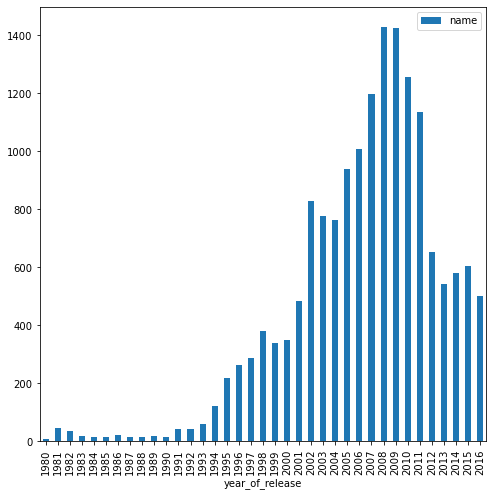

In [17]:
df_by_year = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
df_by_year.plot(kind='bar', figsize=(8, 8))

<div style="border:solid blue 2px; padding: 20px"> 
<b>Вывод:</b> 
С 1980 по 1993 гг. было мало компаний и выпускалось мало игр. Объем выпуска игр начинает активно расти с 1994 года. Наибольшее количество игр было выпущено с 2008 по 2009 гг. Далее с 2010 года объем выпуска игр начал снижаться. 

Задача исследования "выявить определяющие успешность игры закономерности", поэтому для нас будут малоинформативны данные с 1980 по 1993 гг. Т.к. в тот период была низкая конкуренция, и игровая индустрия не была так развита.
    
</div>

<b> Вопрос 2.</b> *Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?*

,total_sales
count,6.000000
mean,924.613333
std,174.136778
min,727.580000
25%,824.880000
50%,911.260000
75%,953.765000
max,1233.560000


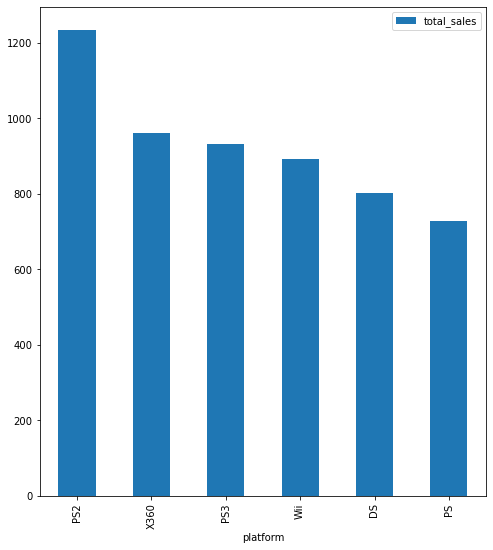

In [18]:
platform_grouped = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
platform_grouped = platform_grouped.head(6).reset_index()
platform_grouped.plot( x='platform', y='total_sales', kind='bar', figsize=(8, 9))
top_platforms_dict = platform_grouped['platform'].unique() #создадим словарь наиболее прибыльных платформ
platform_grouped.describe()

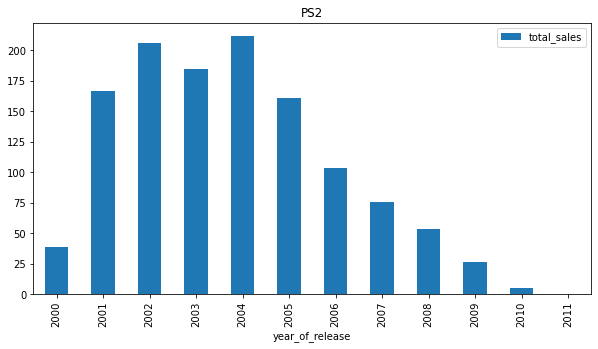

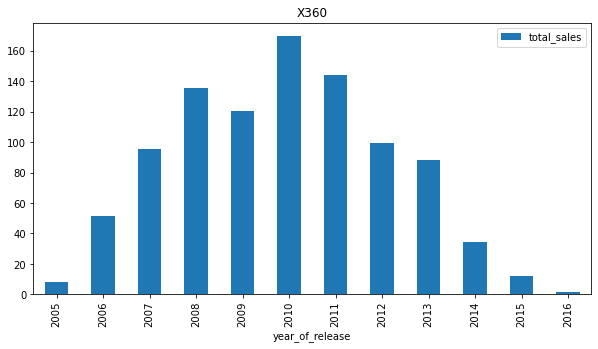

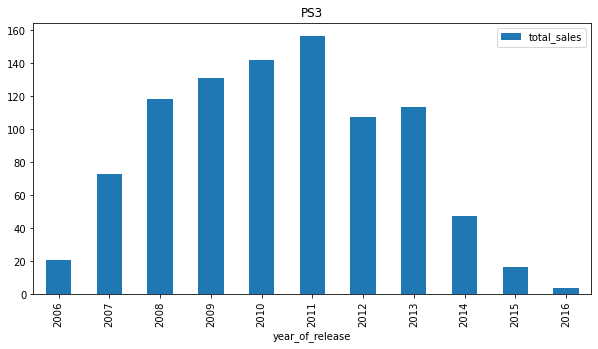

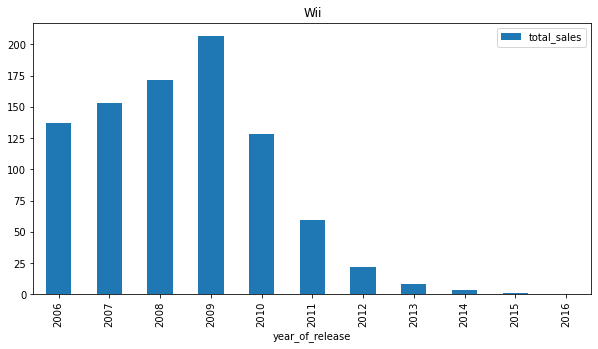

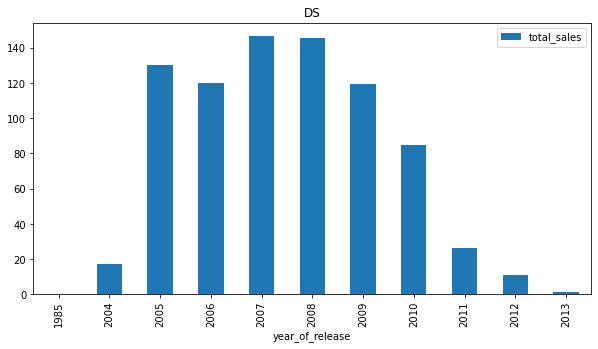

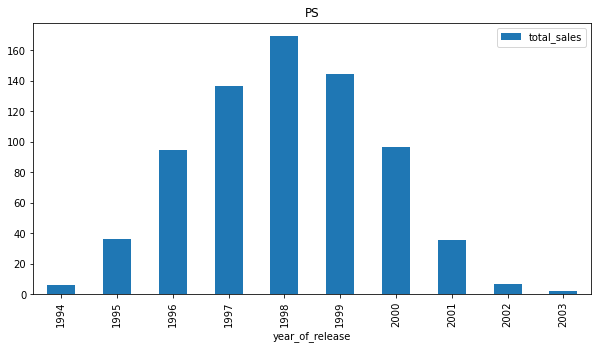

In [19]:
#распределение продаж по годам для наиболее прибыльных платформ

for platform in top_platforms_dict:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc= 'sum').plot(kind='bar', figsize=(10,5))
    plt.title(platform)

<div style="border:solid blue 2px; padding: 20px"> 
<b>Вывод:</b> 
Самые прибыльные по суммарным продажам оказались платформы: PS2, X360, PS3, Wii, DS, PS. У 
этих же платформ к 2016 году практически нулевые продажи, т.к. их сменили новые поколения, например, платформы PS2 и PS3 сменила PS4. Из графиков видим, что срок жизни популярных игр в среднем составляет около 10 лет. 
    
</div>

<b> Вопрос 3.</b> *Определите, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.
Далее работайте только с данными, которые вы определили. Не учитывайте данные за предыдущие годы.*

In [20]:
actual_data = df.query('year_of_release > 2012')
actual_data.head().sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63


<div style="border:solid blue 2px; padding: 20px"> 
<b>Вывод:</b> Можно предположить, что в 2012 произошел кризис (почти в половину снизилось кол-во выпускаемых игр), или смена парадигмы в производстве игр. Упор сменился с объема выпускаемых игр на их качество. Поэтому актуальным периодом для дальнейшего анализа считаю 2013 - 2016 год.
    
</div>

<b> Вопрос 4.</b> *Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.*

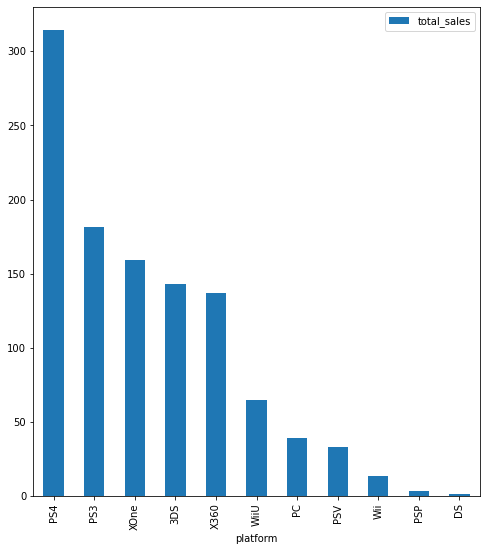

In [21]:
platform_sales = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).plot(kind='bar', figsize=(8, 9))

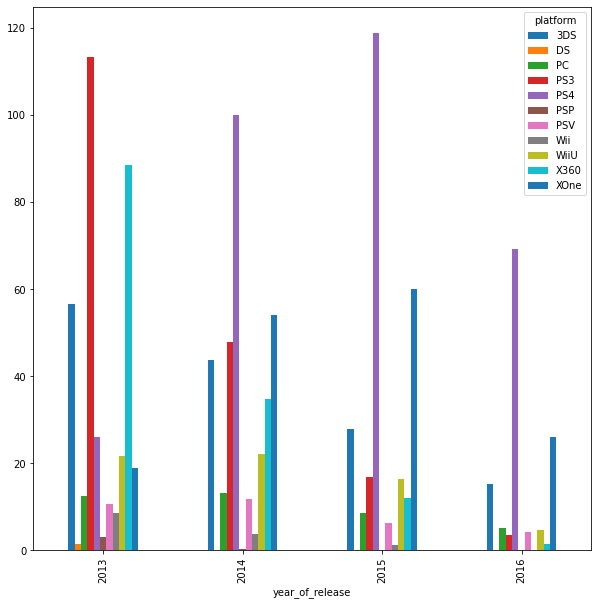

In [22]:
platform_sales_by_year = actual_data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales',
                                        aggfunc='sum').plot(kind='bar', figsize=(10,10), style=dict)

<div style="border:solid blue 2px; padding: 20px">
<b>Вывод:</b>
По продажам лидируют платформы: PS4, PS3, XOne, X360 и 3DS. Их суммарный доход за 3 года около 1 миллиарда долларов.

Продажи растут у PS4, XOne, 3DS, WiiU и PSV, так как они заменяют предыдущее поколение игровых приставок. На убыль идут приставки предыдущего поколения PS3, X360, DS, Wii и PSP.
    
</div>

<b> Вопрос 5.</b> *Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.*

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

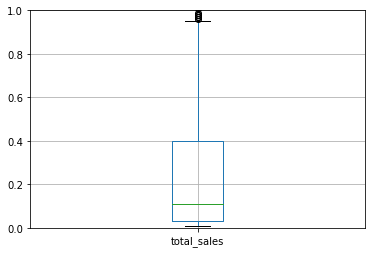

In [23]:
actual_data.boxplot(column = 'total_sales')
plt.ylim(0,1,25)
actual_data['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

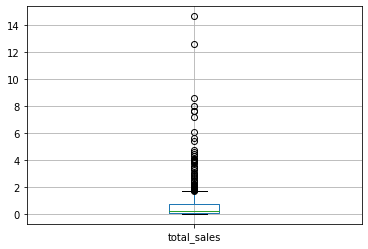

In [24]:
PS4_actual_data = actual_data.query('platform =="PS4"')
PS4_actual_data.boxplot(column = 'total_sales')
PS4_actual_data['total_sales'].describe()

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64

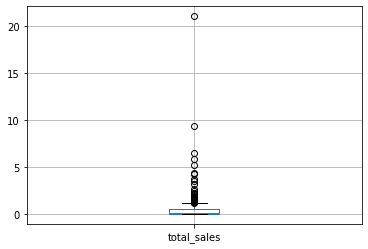

In [25]:
PS3_actual_data = actual_data.query('platform =="PS3"')
PS3_actual_data.boxplot(column = 'total_sales')
PS3_actual_data['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

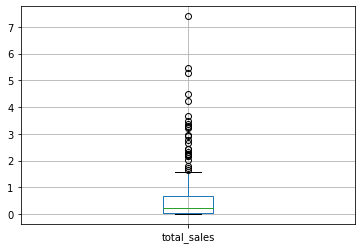

In [26]:
XOne_actual_data = actual_data.query('platform =="XOne"')
XOne_actual_data.boxplot(column = 'total_sales')
XOne_actual_data['total_sales'].describe()

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64

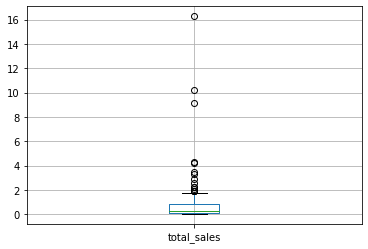

In [27]:
X360_actual_data = actual_data.query('platform =="X360"')
X360_actual_data.boxplot(column = 'total_sales')
X360_actual_data['total_sales'].describe()

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64

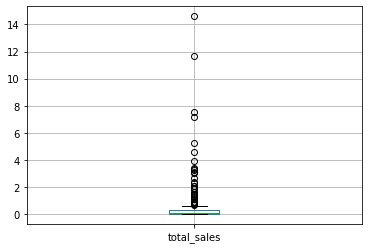

In [28]:
_3DS_actual_data = actual_data.query('platform =="3DS"')
_3DS_actual_data.boxplot(column = 'total_sales')
_3DS_actual_data['total_sales'].describe()

<div style="border:solid blue 2px; padding: 20px"> 
<b>Вывод:</b> 
Разница в продажах существенная. Есть очень популярные игры, которые продаются долгое время и дают много прибыли. А есть много игр, которые не смогли преодолеть порог в 400 тыс. долларов за выбранный период.

Средние продажи на игру по миру: 488 тыс. дол. 3/4 игр в диапазоне до 400 тыс. Максимум 21 млн.

Средние продажи на игру по платформе PS4: 801 тыс. 3/4 игр в диапазоне до 730 тыс. Максимум 14,6 млн.

Средние продажи на игру по платформе PS3: 526 тыс. 3/4 игр в диапазоне до 510 тыс. Максимум 21 млн.

Средние продажи на игру по платформе XOne: 645 тыс. 3/4 игр в диапазоне до 685 тыс. Максимум 7,4 млн.

Средние продажи на игру по платформе X360: 735 тыс. 3/4 игр в диапазоне до 795 тыс. Максимум 16,3 млн.

Средние продажи на игру по платформе 3DS: 472 тыс. 3/4 игр в диапазоне до 280 тыс. Максимум 14,6 млн.

Положительная тенденция к росту продаж у платформ PS4, PS3 и 3DS. Они имеют средние продажи больше 3го квантиля, это говорит о том, что у этих платформ более популярные и продаваемые игры, чем на XOne и X360.
</div>

<b> Вопрос 6.</b> *Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы и соотнесите их с продажами игр на других платформах.*

In [29]:
PS4_sales_crit_and_user_ratings = PS4_actual_data.loc[:,['total_sales', 'critic_score', 'user_score']]
PS4_sales_crit_and_user_ratings.head()

,total_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

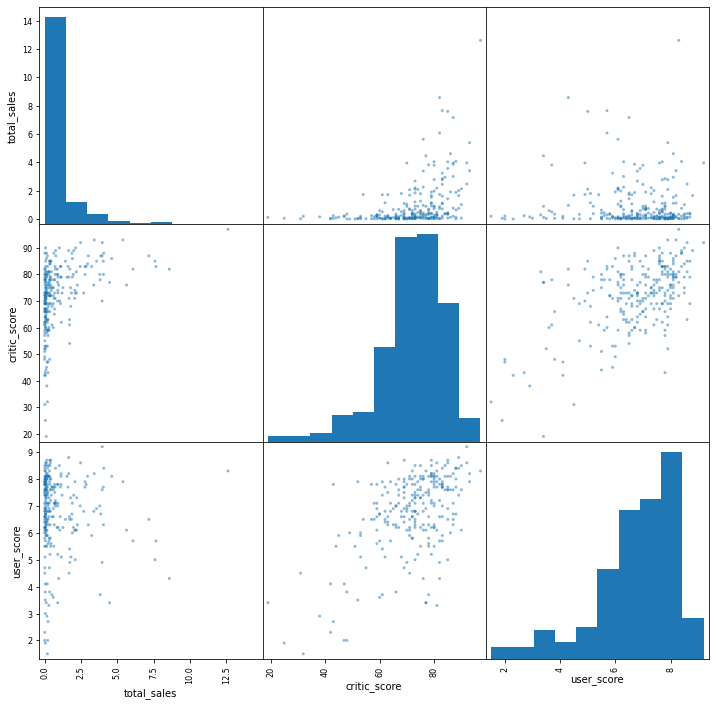

In [30]:
pd.plotting.scatter_matrix(PS4_sales_crit_and_user_ratings, figsize=(12, 12))

In [31]:
PS4_sales_crit_and_user_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


In [32]:
PS3_sales_crit_and_user_ratings = PS3_actual_data.loc[:,['total_sales', 'critic_score', 'user_score']]
PS3_sales_crit_and_user_ratings.head()

,total_sales,critic_score,user_score
16,21.05,97.0,8.2
69,9.36,71.0,2.6
126,6.46,86.0,4.3
149,5.86,95.0,9.1
180,5.27,NaN,NaN


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

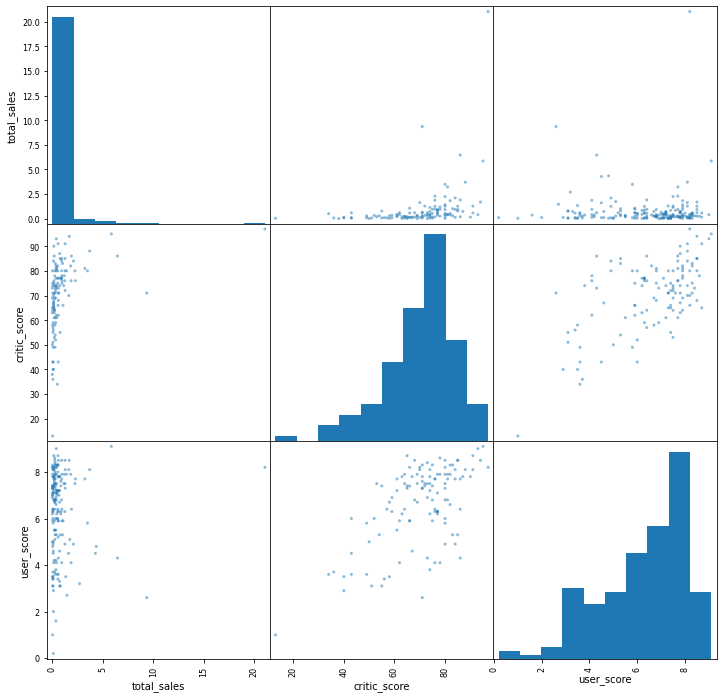

In [33]:
pd.plotting.scatter_matrix(PS3_sales_crit_and_user_ratings, figsize=(12, 12))

In [34]:
PS3_sales_crit_and_user_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


In [35]:
XOne_sales_crit_and_user_ratings = XOne_actual_data.loc[:,['total_sales', 'critic_score', 'user_score']]
XOne_sales_crit_and_user_ratings.head()

,total_sales,critic_score,user_score
99,7.39,NaN,NaN
165,5.47,97.0,7.9
179,5.26,81.0,5.4
242,4.49,84.0,6.4
270,4.22,88.0,6.2


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

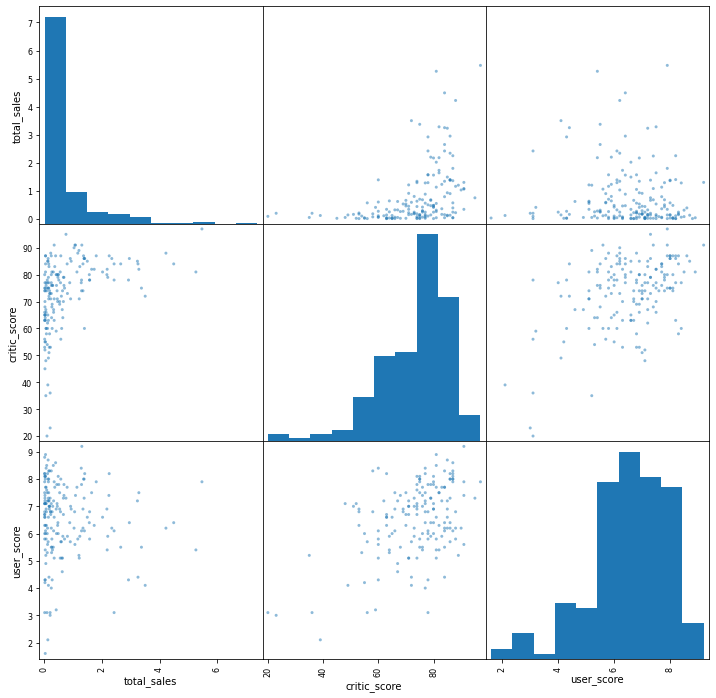

In [36]:
pd.plotting.scatter_matrix(XOne_sales_crit_and_user_ratings, figsize=(12, 12))

In [37]:
XOne_sales_crit_and_user_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


In [38]:
_3DS_sales_crit_and_user_ratings = _3DS_actual_data.loc[:,['total_sales', 'critic_score', 'user_score']]
_3DS_sales_crit_and_user_ratings.head()

,total_sales,critic_score,user_score
33,14.60,NaN,NaN
47,11.68,NaN,NaN
96,7.55,NaN,NaN
108,7.14,NaN,NaN
184,5.22,NaN,NaN


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

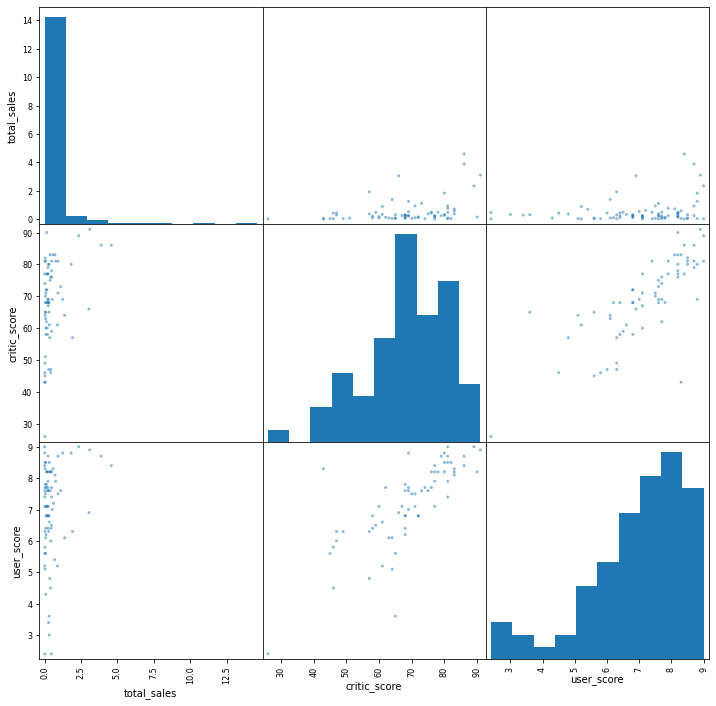

In [39]:
pd.plotting.scatter_matrix(_3DS_sales_crit_and_user_ratings, figsize=(12, 12))

In [40]:
_3DS_sales_crit_and_user_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


In [41]:
X360_sales_crit_and_user_ratings = X360_actual_data.loc[:,['total_sales', 'critic_score', 'user_score']]
X360_sales_crit_and_user_ratings.head()

,total_sales,critic_score,user_score
23,16.27,97.0,8.1
60,10.24,73.0,2.6
72,9.18,NaN,NaN
263,4.28,NaN,4.9
271,4.22,84.0,4.2


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

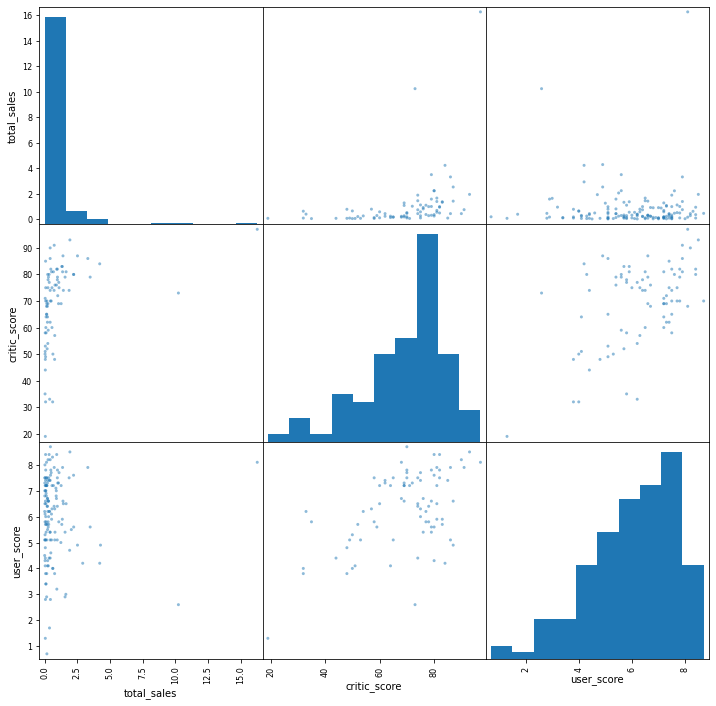

In [42]:
pd.plotting.scatter_matrix(X360_sales_crit_and_user_ratings, figsize=(12, 12))

In [43]:
X360_sales_crit_and_user_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


<div style="border:solid blue 2px; padding: 20px"> 
<b>Вывод:</b>
Для платформы PS4 есть прямая корреляция между продажами и рейтингом критиков. Можно предположить, что важным критерием для платформы является качество игры. 

Между рейтингом критиков и пользователей еще более сильная корреляция. Исходя из анализа, видим, что рейтинг игры влияет на мнение игроков. То есть, чем выше ценит игру критик, тем выше оценит ее игрок.

Также есть незначительная обратная корреляция между продажами и рейтингом пользователей, значит эти величины не зависят друг от друга. 

Платформы PS3, XOne и X360 имеют похожие связи, как и у PS4.

Можно выделить платфому 3DS, чьи продажи зависят напрямую, хоть и не сильно от рейтинга игроков. Можно предположить, что в данном направлении компания лучше ведет работу по составлению рейтинга для игр и системы отзывов для игроков.

   
</div>

<b> Вопрос 7.</b> *Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?*

<AxesSubplot:xlabel='genre'>

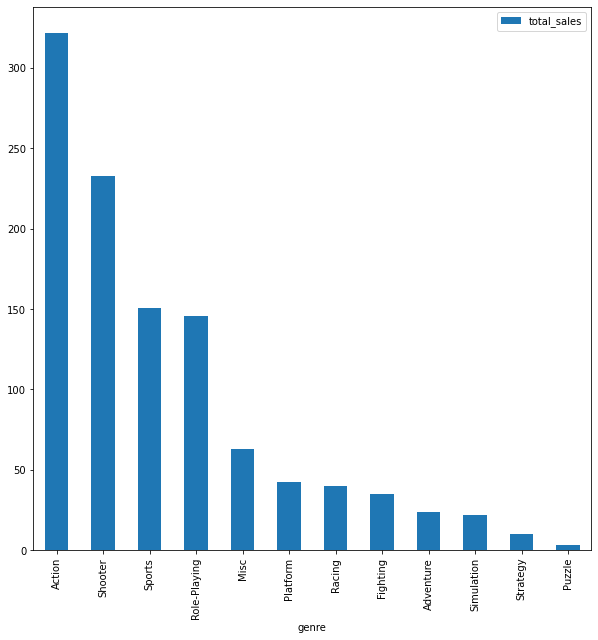

In [44]:
genre_pvt = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_pvt.sort_values('total_sales', ascending=False).plot(kind='bar', figsize=(10,10))

<div style="border:solid blue 2px; padding: 20px"> 
<b>Вывод:</b>
Самые прибыльные жанры: Action, Shooter, Sports и Role-Playing.

Игрокам больше нравятся активные жанры, основаннные на разнообразии действий ("Стрелялки" и "Боевики"), а также ролевые игры, где участвует много игроков. 

Игры логических жанров в сравнении с играми жанра action практически вообще не пользуются спросом.
</div>

# Шаг 5. Составьте портрет пользователя каждого региона

<b> Вопрос 1.</b> 
*Определите для пользователя каждого региона (NA, EU, JP):*

*- Самые популярные платформы (топ-5). Опишите различия в долях продаж.*

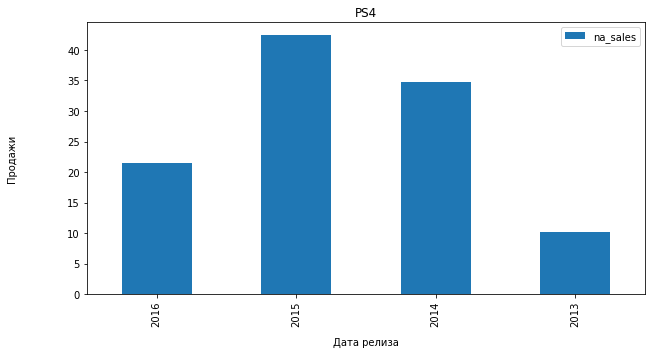

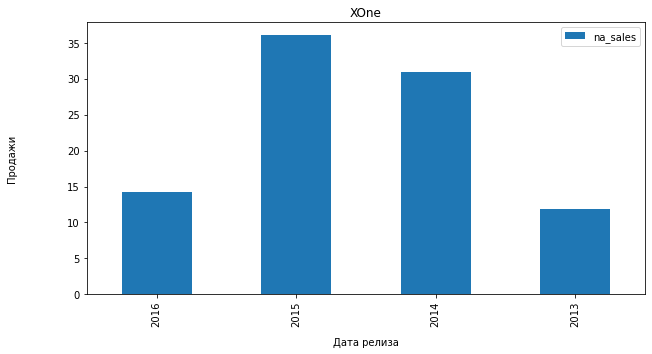

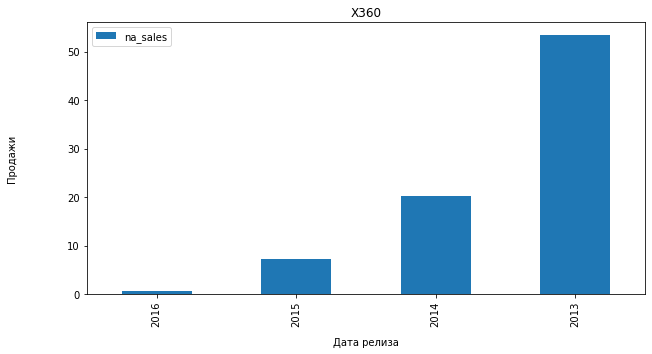

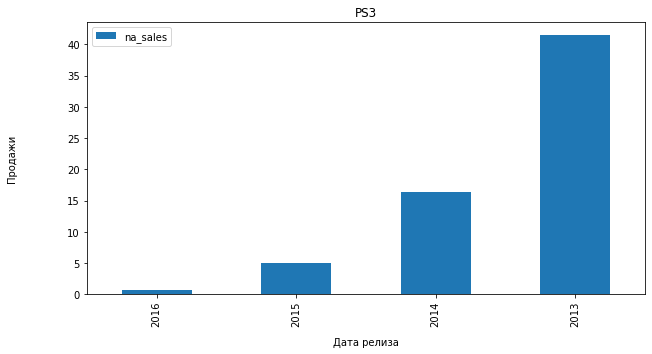

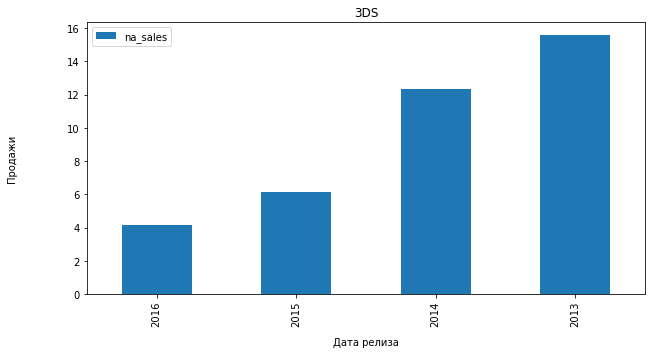

In [45]:
top_5_na_sales = actual_data.query('na_sales > 0').groupby(['platform'], 
            as_index = False)['na_sales'].sum().sort_values('na_sales', 
                                ascending = False).head(5)['platform'].tolist()
 
for name in top_5_na_sales:
    actual_data.query('platform == @name').pivot_table(index = 'year_of_release',
                        values = ['na_sales'], aggfunc = 'sum').sort_values('year_of_release', 
                                                    ascending = False).plot(kind='bar',figsize = (10, 5), title = name)
    
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.legend()

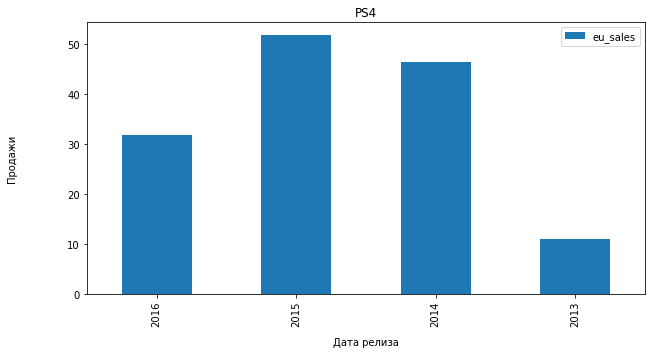

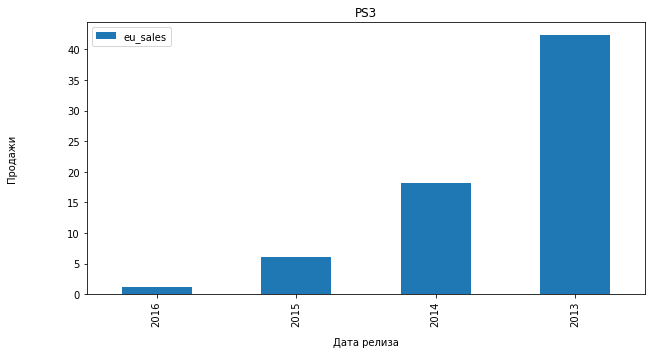

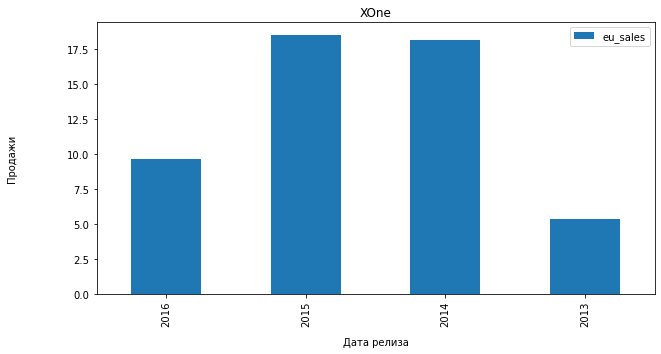

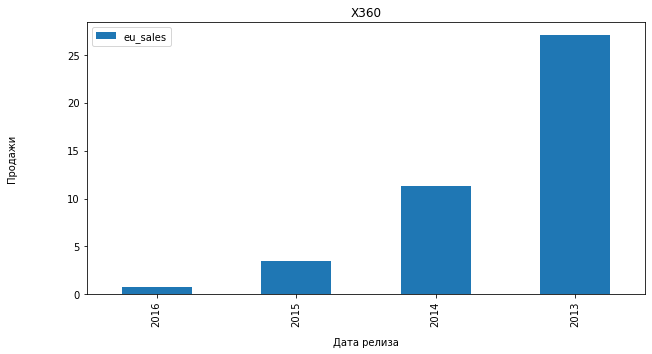

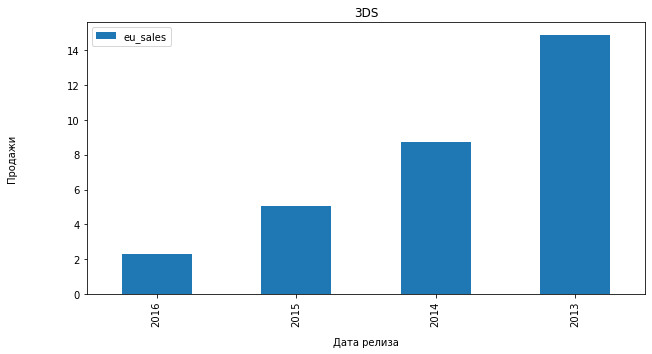

In [46]:
top_5_eu_sales = actual_data.query('eu_sales > 0').groupby(['platform'], 
            as_index = False)['eu_sales'].sum().sort_values('eu_sales', 
                                ascending = False).head(5)['platform'].tolist()
 
for name in top_5_eu_sales:
    actual_data.query('platform == @name').pivot_table(index = 'year_of_release',
                        values = ['eu_sales'], aggfunc = 'sum').sort_values('year_of_release', 
                                                    ascending = False).plot(kind='bar',figsize = (10, 5), title = name)
    
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.legend()

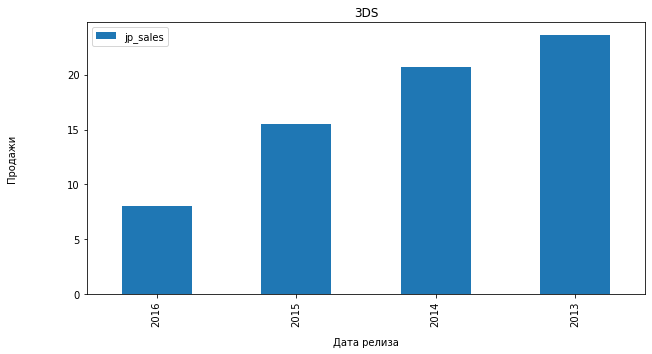

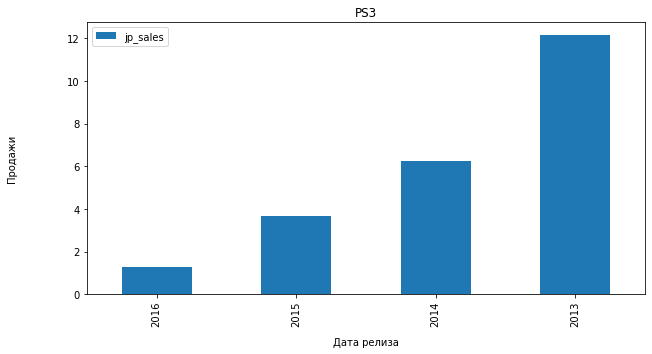

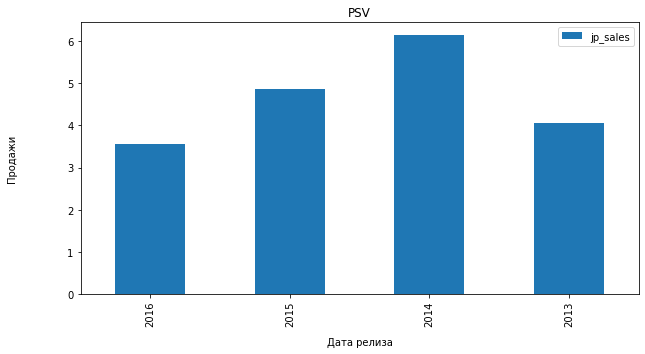

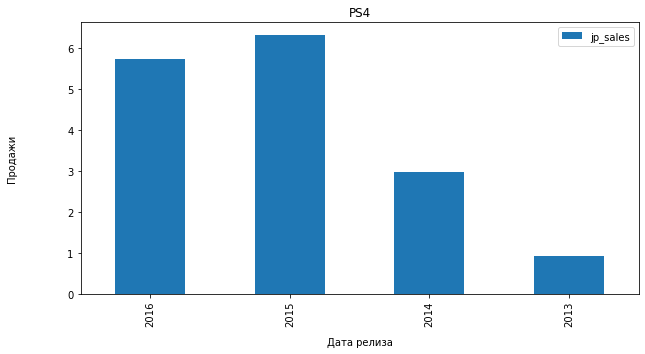

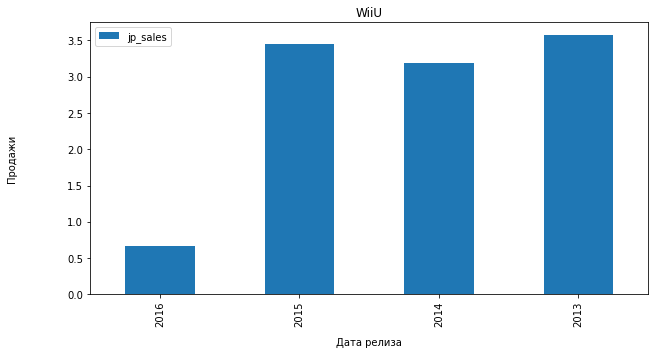

In [47]:
top_5_jp_sales = actual_data.query('jp_sales > 0').groupby(['platform'], 
            as_index = False)['jp_sales'].sum().sort_values('jp_sales', 
                                ascending = False).head(5)['platform'].tolist()
 
for name in top_5_jp_sales:
    actual_data.query('platform == @name').pivot_table(index = 'year_of_release',
                        values = ['jp_sales'], aggfunc = 'sum').sort_values('year_of_release', 
                                                    ascending = False).plot(kind='bar',figsize = (10, 5), title = name)
    
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.legend()

<div style="border:solid blue 2px; padding: 20px"> 
<b>Вывод:</b>
Рейтинг платформ по суммарным продажам в регионе:

Топ 5 по Северной Америке: PS4, XOne, X360, PS3 и 3DS

Топ 5 по Европейскому региону: PS4, PS3, XOne, X360 и 3DS

Топ 5 по Японии: 3DS, PS3, PSV, PS4 и WiiU

Получается, что за выбранный период 2013-2016 гг. по суммарным продажам в регионах есть незначительные различия в предпочтениях пользователей в Америке и Европе. Самые высокие продажи в этих регионах у PS4, платформа XOne по продажам на 2м месте. 

А в Японии PS4 находится на 4м месте, самые высокие суммарные продажи у 3DS (Нинтендо).

Но с разбивкой продаж по годам видна одна общая тенденция по всем регионам, PS4 охватывает все большую долю рынка и ее продажи растут.  У PS3 самые высокие продажи в 2013 году во всех регионах и к 2016  идет активный спад. 

В Америке и Европе к 2016 году продажи растут у XOne,  а вот в Японии на 2м месте PSV.
</div>

<b> Вопрос 2.</b> *- Самые популярные жанры (топ-5). Поясните разницу.*

              eu_sales  jp_sales  na_sales
genre                                     
Action           78.65     17.80     77.82
Adventure         3.66      0.91      2.70
Fighting          5.79      5.49      9.70
Misc              9.20      4.27     11.52
Platform         10.15      4.63     11.80
Puzzle            0.45      0.53      0.59
Racing           14.99      2.09      9.64
Role-Playing     29.09     26.70     36.13
Shooter          66.13      6.49     75.74
Simulation        3.29      3.36      1.54
Sports           36.97      2.23     17.47
Strategy          0.37      0.30      0.58


<AxesSubplot:xlabel='genre'>

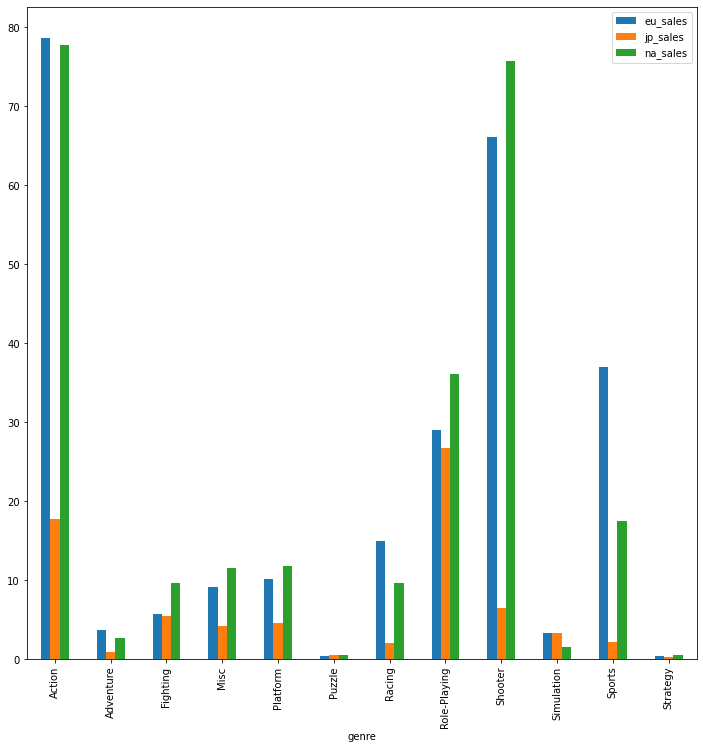

In [48]:
genre_by_area = actual_data.query('jp_sales > 0 and eu_sales > 0 and na_sales > 0').pivot_table(index='genre', 
    values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='genre')
print(genre_by_area)
genre_by_area.plot(kind='bar', figsize=(12, 12))

<div style="border:solid blue 2px; padding: 20px"> 
<b>Вывод:</b>
Рейтинг жанров:

Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing и Misc

Топ 5 по Европейскому региону: Action, Shooter, Sports, Role-Playing и Racing

Топ 5 по Японии: Role-Playing, Action, Misc, Fighting и Shooter

Как и в выборе платформы, так и в выборе по жанру Америка и Европа солидарны. Япония больше предпочитает ролевые игры, а потом уже экшн. В целом можно отметить, что японские игроманы выбирают более "вдумчивые" жанры.
 </div>

<b> Вопрос 2.</b> *Влияет ли рейтинг ESRB на продажи в отдельном регионе?*

        eu_sales  jp_sales  na_sales
rating                              
E         108.37     33.35    102.09
E10+       42.69      5.89     54.24
M         162.21     14.92    184.77
T          78.96     86.62     96.61


<AxesSubplot:xlabel='rating'>

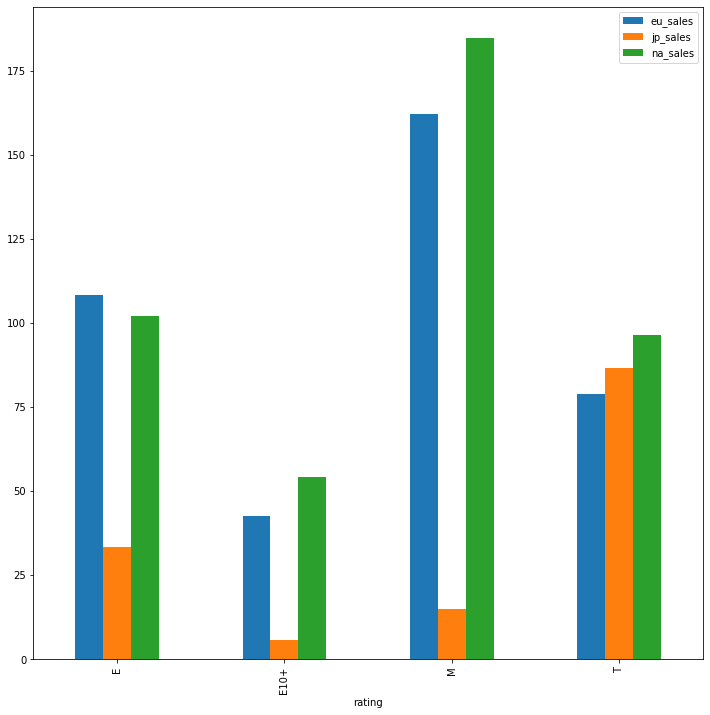

In [49]:
rating_by_area = actual_data.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], 
                aggfunc='sum').sort_values(by='rating')
print(rating_by_area)
rating_by_area.plot(kind='bar', figsize=(12, 12))

<div style="border:solid blue 2px; padding: 20px"> 
<b>Вывод:</b> Рейтинг возраста влияет по каждому региону.

В Америке и Европе схожие ситуации, лучше всего продаются игры с возрастным рейтингом М (17+). Следом идут игры для любого возраста. В Японии же лидируют по продажам игры с рейтингом 13+, также на 2м месте расположились игры с рейтингом Е (для всех возрастов).

</div>

# Шаг 6. Проведите исследование статистических показателей

*Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитайте среднее количество, дисперсию и стандартное отклонение. Опишите распределения.*

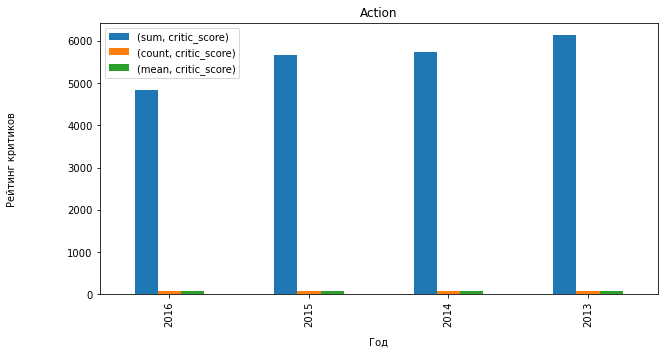

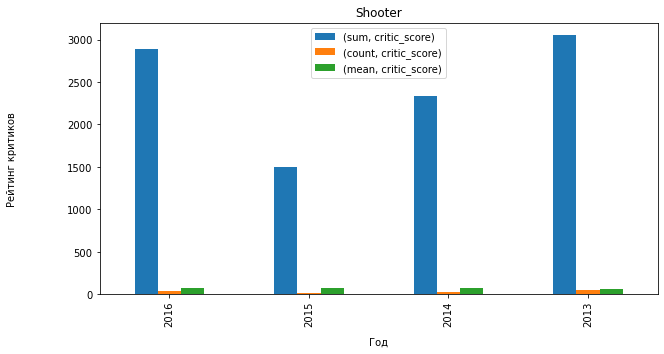

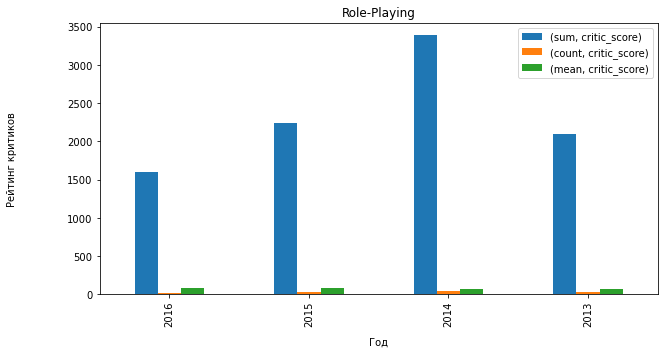

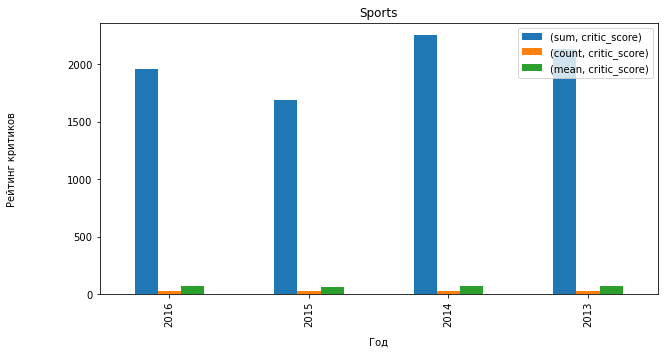

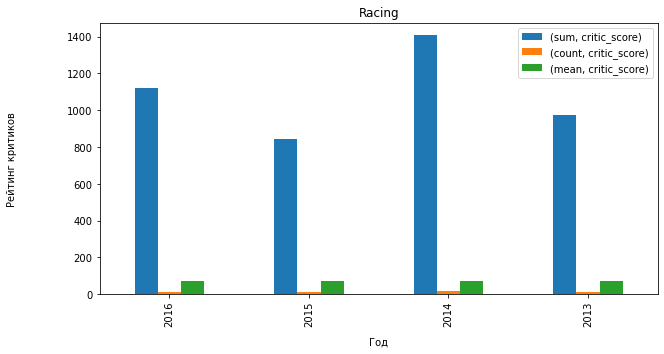

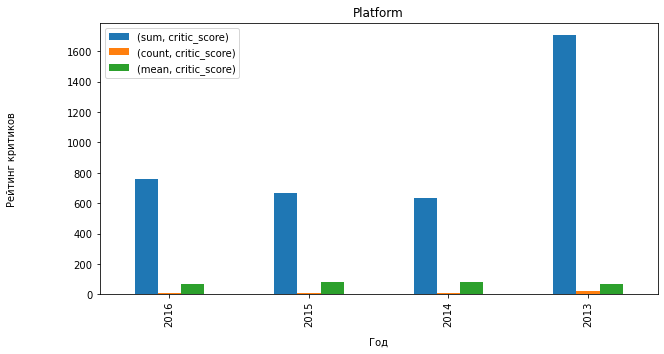

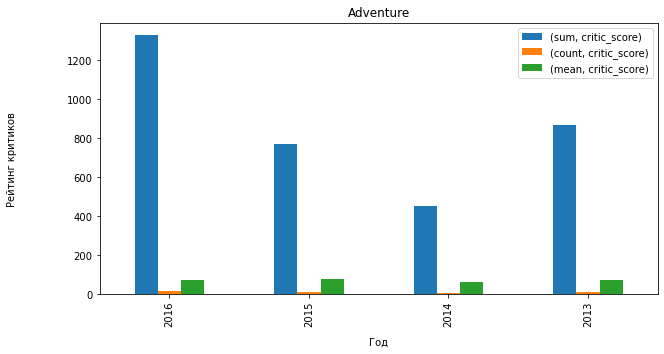

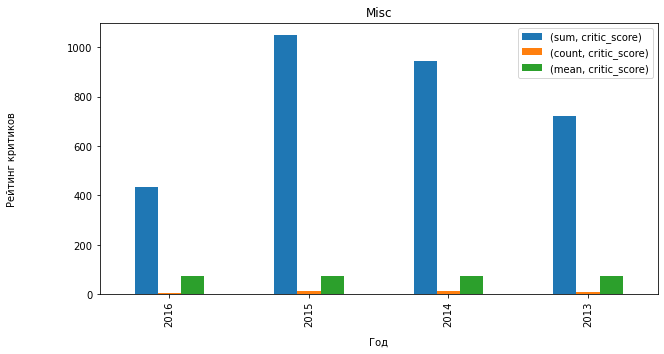

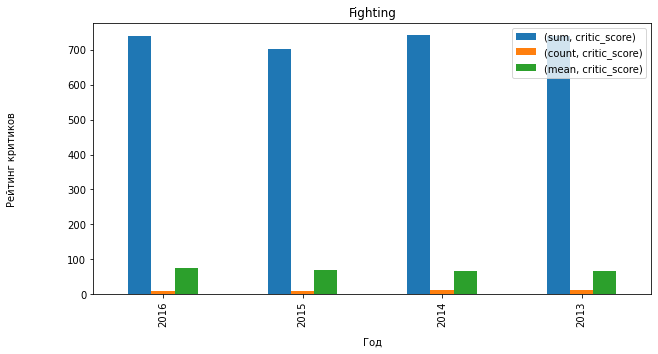

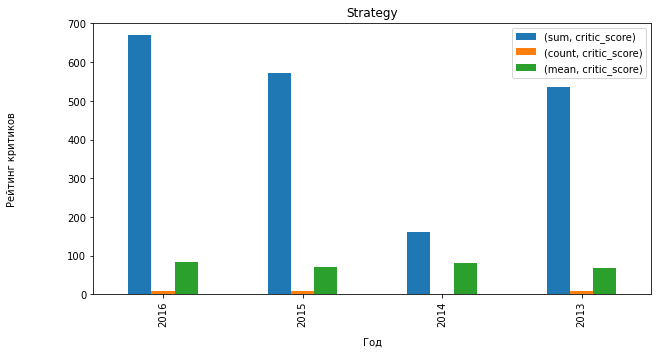

In [50]:
genre_critic_score = actual_data.query('critic_score > 0').groupby(['genre'], 
            as_index = False)['critic_score'].sum().sort_values('critic_score', 
                                ascending = False).head(10)['genre'].tolist()
 
for name in genre_critic_score:
    actual_data.query('genre == @name').pivot_table(index = 'year_of_release',
                        values = ['critic_score'], aggfunc = ['sum', 'count','mean']).sort_values('year_of_release', 
                                                    ascending = False).plot(kind='bar',figsize = (10, 5), title = name)
    
    plt.xlabel('Год', labelpad = 10)
    plt.ylabel('Рейтинг критиков', labelpad = 50)
    plt.legend()

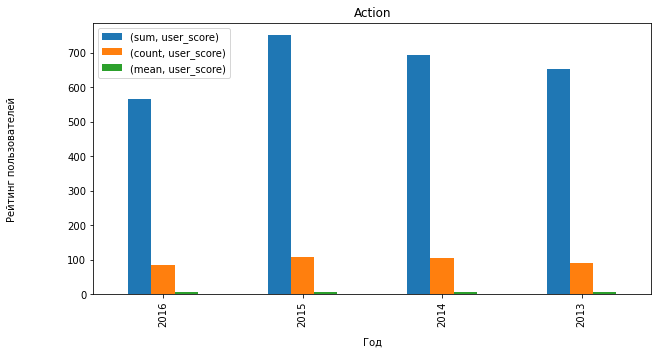

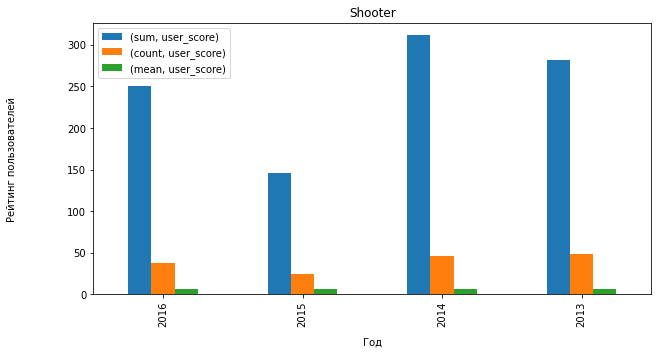

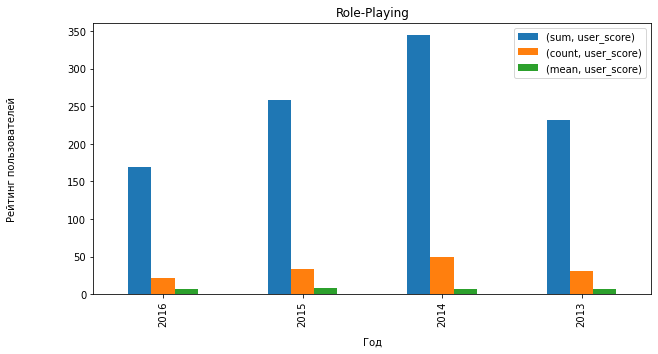

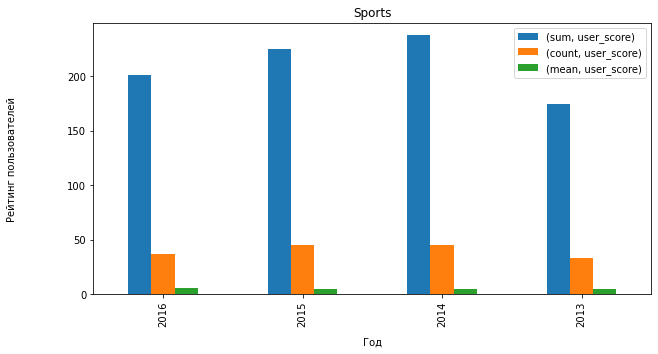

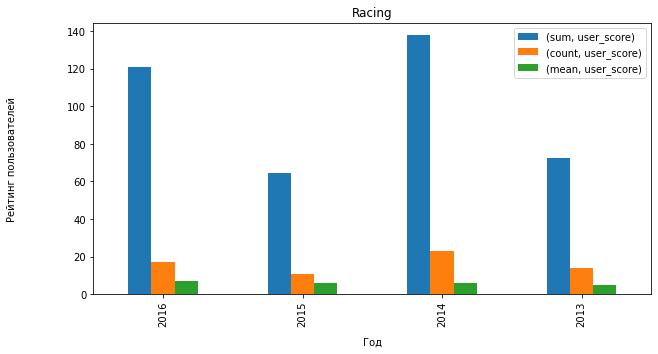

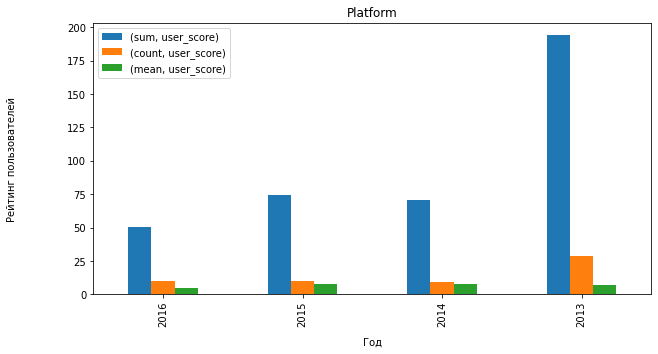

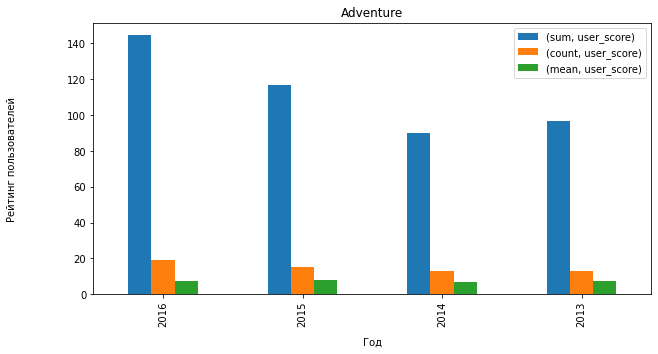

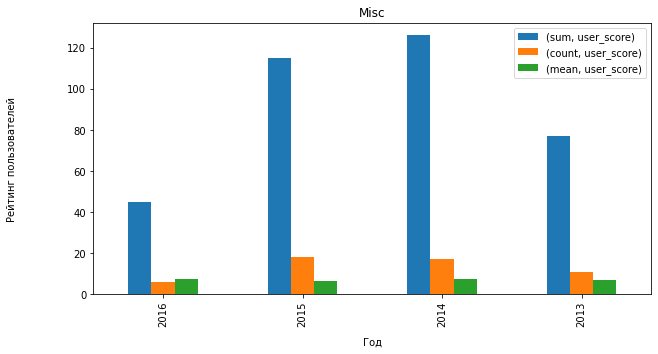

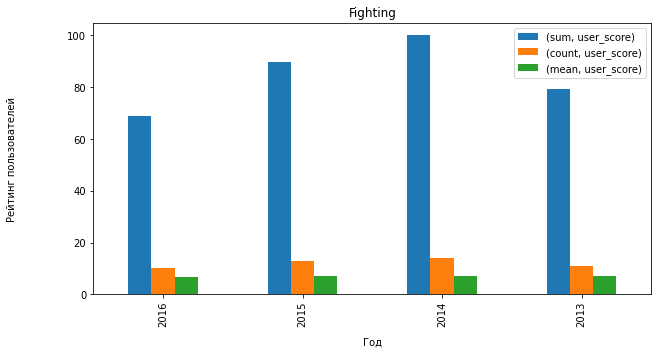

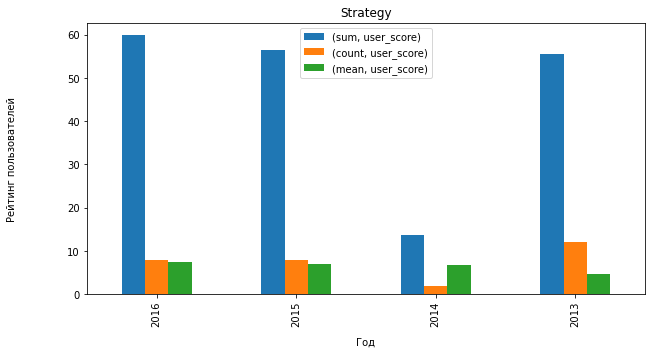

In [51]:
genre_user_score = actual_data.query('user_score > 0').groupby(['genre'], 
            as_index = False)['user_score'].sum().sort_values('user_score', 
                                ascending = False).head(10)['genre'].tolist()
 
for name in genre_critic_score:
    actual_data.query('genre == @name').pivot_table(index = 'year_of_release',
                        values = ['user_score'], aggfunc = ['sum', 'count','mean']).sort_values('year_of_release', 
                                                    ascending = False).plot(kind='bar',figsize = (10, 5), title = name)
    
    plt.xlabel('Год', labelpad = 10)
    plt.ylabel('Рейтинг пользователей', labelpad = 50)
    plt.legend()

In [52]:
genre_score = actual_data.pivot_table(index='genre', values=['critic_score','user_score'], 
                aggfunc=['sum', 'count', 'mean']).sort_values(by='genre')
genre_score

sum                   count                    mean  \
             critic_score user_score critic_score user_score critic_score   
genre                                                                       
Action            22365.0     2659.8          313        389    71.453674   
Adventure          3414.0      447.7           47         60    72.638298   
Fighting           2923.0      337.8           42         48    69.595238   
Misc               3151.0      362.7           43         52    73.279070   
Platform           3765.0      389.4           51         58    73.823529   
Puzzle              529.0       52.3            7          7    75.571429   
Racing             4345.0      395.2           61         65    71.229508   
Role-Playing       9331.0     1003.2          127        136    73.472441   
Shooter            9771.0      989.4          134        156    72.917910   
Simulation         1816.0      187.7           28         31    64.857143   
Sports             8026.0      838.1          112        160    71.660714   
Strategy           1939.0      185.5           26         30    74.576923   

                         
             user_score  
genre                    
Action         6.837532  
Adventure      7.461667  
Fighting       7.037500  
Misc           6.975000  
Platform       6.713793  
Puzzle         7.471429  
Racing         6.080000  
Role-Playing   7.376471  
Shooter        6.342308  
Simulation     6.054839  
Sports         5.238125  
Strategy       6.183333

In [53]:
actual_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,72.023209,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,12.841318,1.610413,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


<AxesSubplot:>

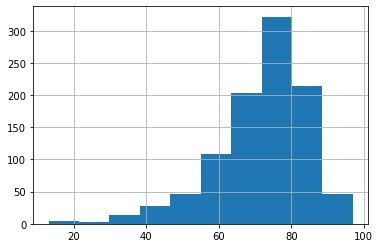

In [54]:
actual_data['critic_score'].hist()

<AxesSubplot:>

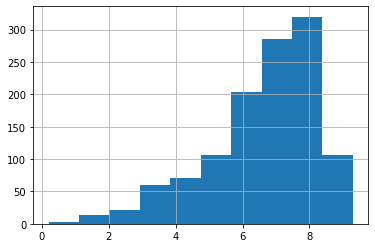

In [55]:
actual_data['user_score'].hist()

In [56]:
variance_estimate = np.var(actual_data['user_score'])
print(variance_estimate) 

2.5912550110355372


In [57]:
variance_estimate = np.var(actual_data['critic_score'])
print(variance_estimate) 

164.73306376968878


<div style="border:solid blue 2px; padding: 20px">
<b>Вывод:</b>
Больше всего оценок, как у критиков, так и у пользователей по играм в наиболее популярных жанрах: Action, Shooter, Sports, Role-Playing. Средняя и медиана практически не отличаются, значит большого разброса по оценкам критиков и пользователей нет. В основном игры оцениваются положительно, по гистограммам видно, что критики чаще ставят оценки в диапазоне от 70 до 80. А пользователи - от 7 до 8. Но в общем сложилось впечатление, что пользователи немного благосклоннее.
    
</div>

# Шаг 7. Проверьте гипотезы

- *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;*

- *Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.*

*Задайте самостоятельно пороговое значение alpha.*

In [58]:
def stat_info(serie, bins=0): #Подготовка данных по первой гипотезе. Исключим игры с пустым рейтингом.
    serie_description = serie.describe()
    mean = serie_description[1]
    std = serie_description[2]
    d_min = serie_description[3]
    q1 = serie_description[4]
    median = serie_description[5]
    q3 = serie_description[6]
    d_max = serie_description[7]
    left_border = d_min
    right_border = d_max
    if bins == 0:
        bins = right_border - left_border
        if bins>100:
            bins = 100
        elif bins < 1:
            bins = abs(bins*10)+1
        bins = int(bins)
    else:
        bins = bins
    serie.hist(bins=bins, range=(left_border, right_border))
    print(serie_description)
    variance_estimate = np.var(serie, ddof=1)
    standart_dev = np.std(serie, ddof=1)
    print('Среднее значение: {:.2f}'.format(mean))
    print('Дисперсия: {:.2f}'.format(variance_estimate))
    print('Стандартное отклонение: {:.2f}'.format(standart_dev))
    return [mean, variance_estimate, standart_dev]

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
Среднее значение: 6.52
Дисперсия: 1.91
Стандартное отклонение: 1.38


[6.52142857142857, 1.9069968429360702, 1.3809405645921442]

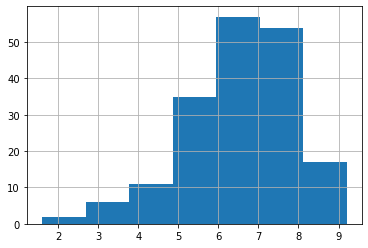

In [59]:
user_rating_XOne = actual_data.query('platform == "XOne"')['user_score'].dropna()
stat_info(user_rating_XOne)

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64
Среднее значение: 6.27
Дисперсия: 3.04
Стандартное отклонение: 1.74


[6.269677419354836, 3.035892752408884, 1.7423813452883625]

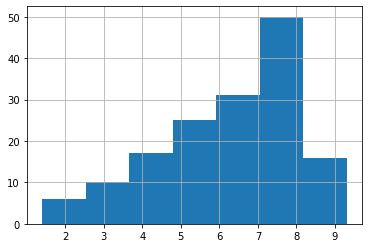

In [60]:
user_rating_PC = actual_data.query('platform == "PC"')['user_score'].dropna()
stat_info(user_rating_PC)

<div style="border:solid blue 2px; padding: 20px">
Средние кол-ва значений похожи, дисперсия выборок отличается.

Нулевая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Альтернативная гипотеза гласит: "Средние пользовательские рейтинги платформ Xbox One и PC различаются".

Для оценки гипотезы необходимо применить тест Стьюдента. 
При получении ответа "Отвергаем нулевую гипотезу", делаю вывод, что данные различаются и нулевая гипотеза неверна.

При получении ответа "Не получилось отвергнуть нулевую гипотезу"- это значит, что нулевая гипотеза подтвердиась.
</div>

In [61]:

alpha = 0.01

results = st.ttest_ind(user_rating_XOne, user_rating_PC)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Подготовим данные для жанров Action и Sports.

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
Среднее значение: 6.84
Дисперсия: 1.77
Стандартное отклонение: 1.33


[6.837532133676097, 1.76936090424827, 1.3301732609883083]

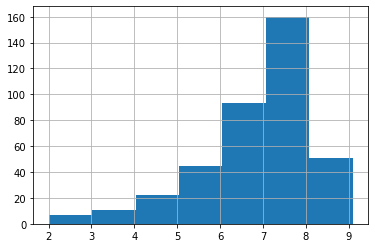

In [62]:
user_rating_Action = actual_data.query('genre == "Action"')['user_score'].dropna()
stat_info(user_rating_Action)

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64
Среднее значение: 5.24
Дисперсия: 3.18
Стандартное отклонение: 1.78


[5.238124999999999, 3.1806128144654062, 1.783427266379374]

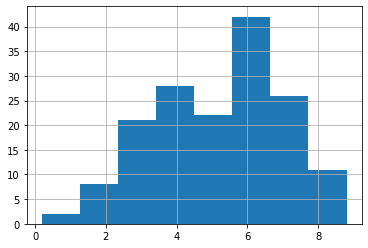

In [63]:
user_rating_Sports = actual_data.query('genre == "Sports"')['user_score'].dropna()
stat_info(user_rating_Sports)

Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports одинаковые".

Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports различаются".

Для оценки гипотезы также необходимо применить тест Стьюдента. 

In [64]:
alpha = 0.01

results = st.ttest_ind(user_rating_Action, user_rating_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


<div style="border:solid blue 2px; padding: 20px">
<b>Вывод:</b>
Нулевая гипотеза об одинаковых средних пользовательских рейтингах платформ PC и XOne подтвердилась, это можно было наблюдать при анализе зависимости платформ, рейтинга и суммарных продаж.  Не зря данные платформы возглавляли топ по продажам, пользователи любят данные платформы и оценивают примерно одинаково. 
Нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые была отвергнута. Жанр Action самый популярный среди игроков, в этом жанре выпускается большее кол-во игр. А также из проведенного статистического анализа мы знаем, что средний пользовательский рейтинг жанра Action = 6.837532, а жанра Sports = 5.238125.
    
</div>

# Общий вывод 

<div style="border:solid red 2px; padding: 20px">
В ходе исследования было выполнено:

1) Были изучены данные из файла, выявлены аномалии и пропущенные значения;

2) Проведена подготовка данных (предобработка);

3) Проведен исследовательский анализ данных, который на каждом этапе был подкреплен выводами;

4) Составлен портрет пользователей каждого региона;

5) Проведено исследование статистических показателей; 

6) Выполнена проверка гипотез.

<b>Цель исследования - выявить определяющие успешность игры закономерности.</b>

В ходе анализа были выявлены тенденции развития игровой индустрии, с 2013 года сменилась парадигма выпуска игр с кол-ва на качество. Средняя продолжительность жизни популярной платформы около 10 лет. 

Лидерами среди игровых платформ являются PS4, ХОne для Америки и Европы, а для Японии PS4, PSV и WiiU.

Игровой портрет американских и европейких пользователей отличается от портрета японцев.

Американцы и европейцы выбирают платформы для игр PS4 и XONE, преобладающая целевая аудитория - это люди в возрасте 17+, которые в основном предпочитают игры  в жанрах: Action, Shooter, Sports, Role-Playing.

Японские пользователи выбирают платформы PS4 и PSМ (тенденция на 2016 год), преобладающая целевая аудитория - это подростки 13+, которые в основном предпочитают игры  в жанрах: Role-Playing, Action, Misc, Fighting и Shooter.

Стоит отметить, что в японском регионе отдают предпочтение своим производителям. В Америке и Европе наряду с японским лидером рынка PS4, также популярна "местная" платфома XONE, которая производится компанией Microsoft. 

При прогнозировании затрат на рекламные кампании обязательно нужно учитывать разные целевые аудитории по регионам. 


</div>